In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

# Подготовка

## Датасет
Для тестирования LeNet-5 можно использовать датасет FashionMNIT, так как изображения в нем размера $28 \times 28$, как раз подходит под вход без ресайза

In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from data.mnist import MNIST


train_data = MNIST(
    root='../dataset/MNIST/',
    train=True,
    transform=transforms.ToTensor(),
)

test_data = MNIST(
    root='../dataset/MNIST/',
    train=False,
    transform=transforms.ToTensor(),
)

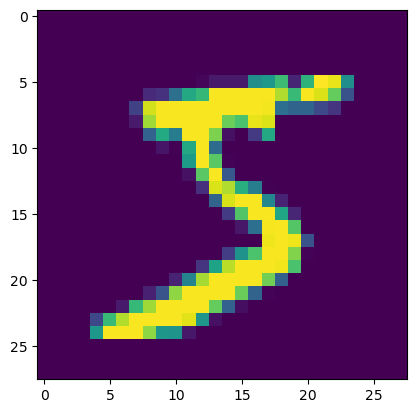

In [7]:
plt.imshow(train_data[0][1].permute((1, 2, 0)))

## Проверка использования GPU

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.cuda.current_device()

0

In [10]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1070 Ti'

## Подготовка модели и лоадеров

In [79]:
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [92]:
from model.lenet5 import LeNet5
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from evaluation.eval import ClassificationEvaluator
from evaluation.metrics import Metric
from evaluation.logging import NotebookLogger

model = LeNet5('../config/lenet-5.yaml', nc=10)
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = CrossEntropyLoss()
evaluator = ClassificationEvaluator([Metric.Accuracy, Metric.Precision, Metric.Recall, Metric.F1], logger=NotebookLogger)

In [93]:
from trainer.supervised import ClassificationTrainer

trainer = ClassificationTrainer(model, train_loader, test_loader, loss_fn, optimizer, evaluator, eval_freq=100)

# Тестирование

In [94]:
epochs = 100

for epoch in range(epochs):
    trainer.train()

Validation loss: 0.036150217056274414
Current metrics:
    Accuracy  Precision  Recall      F1     loss
id                                              
0     0.1032     0.1032  0.1032  0.1032  0.03615
Validation loss: 0.0360942967236042
Current metrics:
     Accuracy  Precision  Recall      F1      loss
id                                                
0      0.1032     0.1032  0.1032  0.1032  0.036150
100    0.2830     0.2830  0.2830  0.2830  0.036094
Validation loss: 0.03030289150774479
Current metrics:
     Accuracy  Precision  Recall      F1      loss
id                                                
0      0.1032     0.1032  0.1032  0.1032  0.036150
100    0.2830     0.2830  0.2830  0.2830  0.036094
200    0.5273     0.5273  0.5273  0.5273  0.030303
Validation loss: 0.02961406111717224
Current metrics:
     Accuracy  Precision  Recall      F1      loss
id                                                
0      0.1032     0.1032  0.1032  0.1032  0.036150
100    0.2830     0.2830 

KeyboardInterrupt: 

In [95]:
evaluator.logger.get_log()

,Accuracy,Precision,Recall,F1,loss
id,,,,,
0,0.1032,0.1032,0.1032,0.1032,0.036150
100,0.2830,0.2830,0.2830,0.2830,0.036094
200,0.5273,0.5273,0.5273,0.5273,0.030303
300,0.5687,0.5687,0.5687,0.5687,0.029614
400,0.7060,0.7060,0.7060,0.7060,0.027585
500,0.7497,0.7497,0.7497,0.7497,0.026857
600,0.7374,0.7374,0.7374,0.7374,0.027040
700,0.7674,0.7674,0.7674,0.7674,0.026581
800,0.7457,0.7457,0.7457,0.7457,0.026908
